# Exploring The Data:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'SampleSuperstore.csv'

df = pd.read_csv(file_path)

print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [6]:
print(df.isnull().sum())

df.dropna(inplace=True)


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [7]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


# Business Problems

In [8]:
import pandas as pd
file_name = 'SampleSuperstore.csv'

df = pd.read_csv(file_name)
sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
print(sales_profit)


                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


# Weak Areas

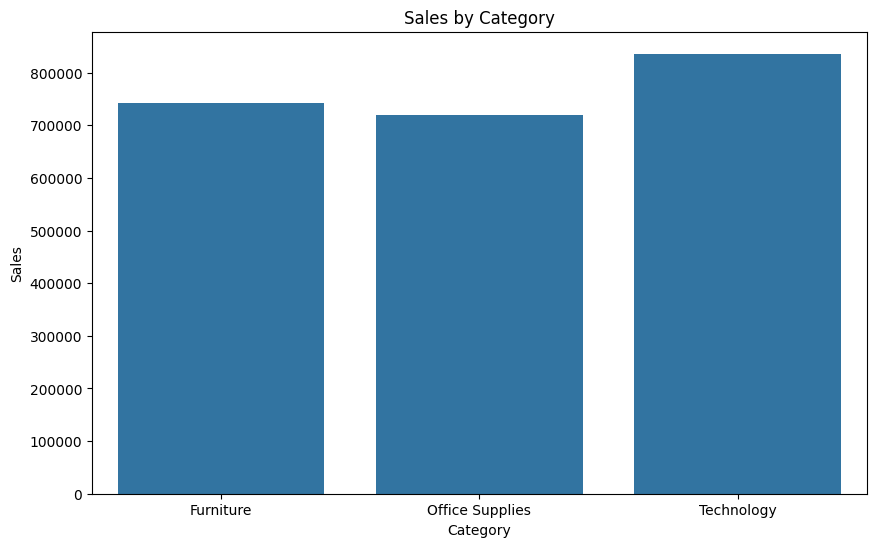

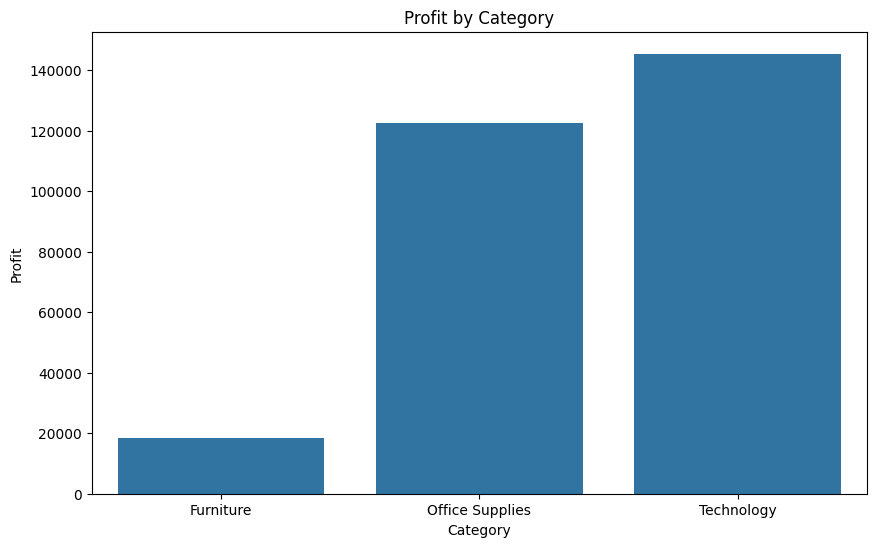

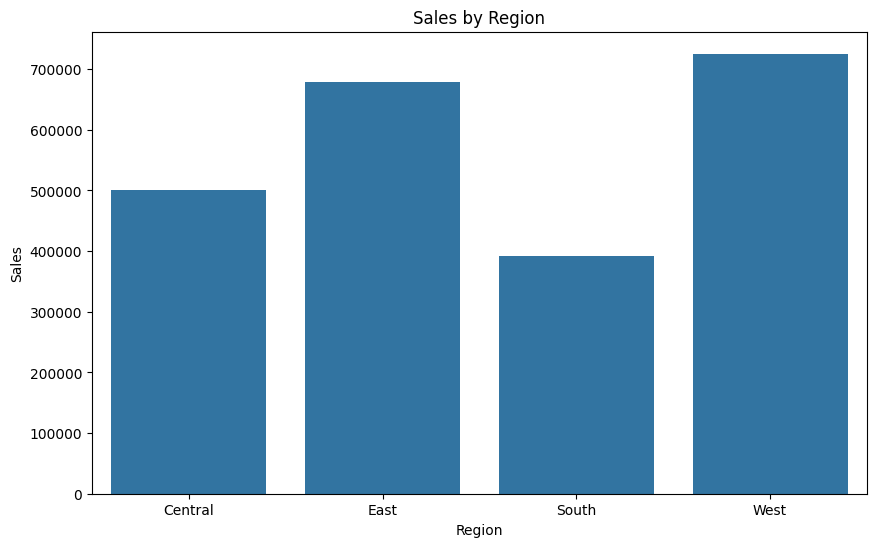

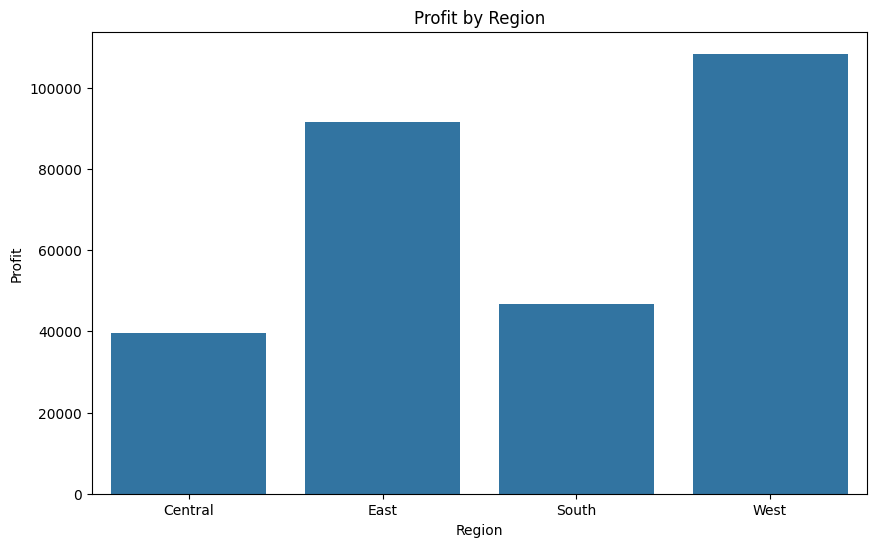

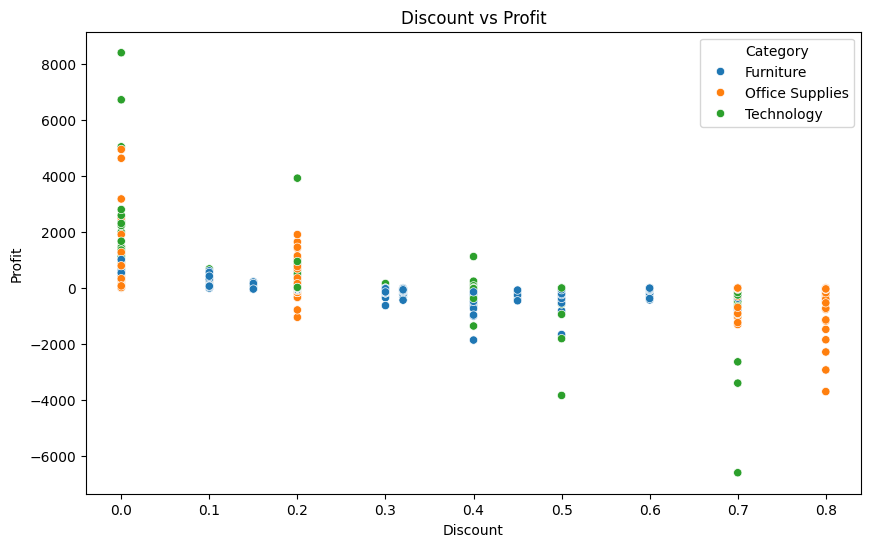

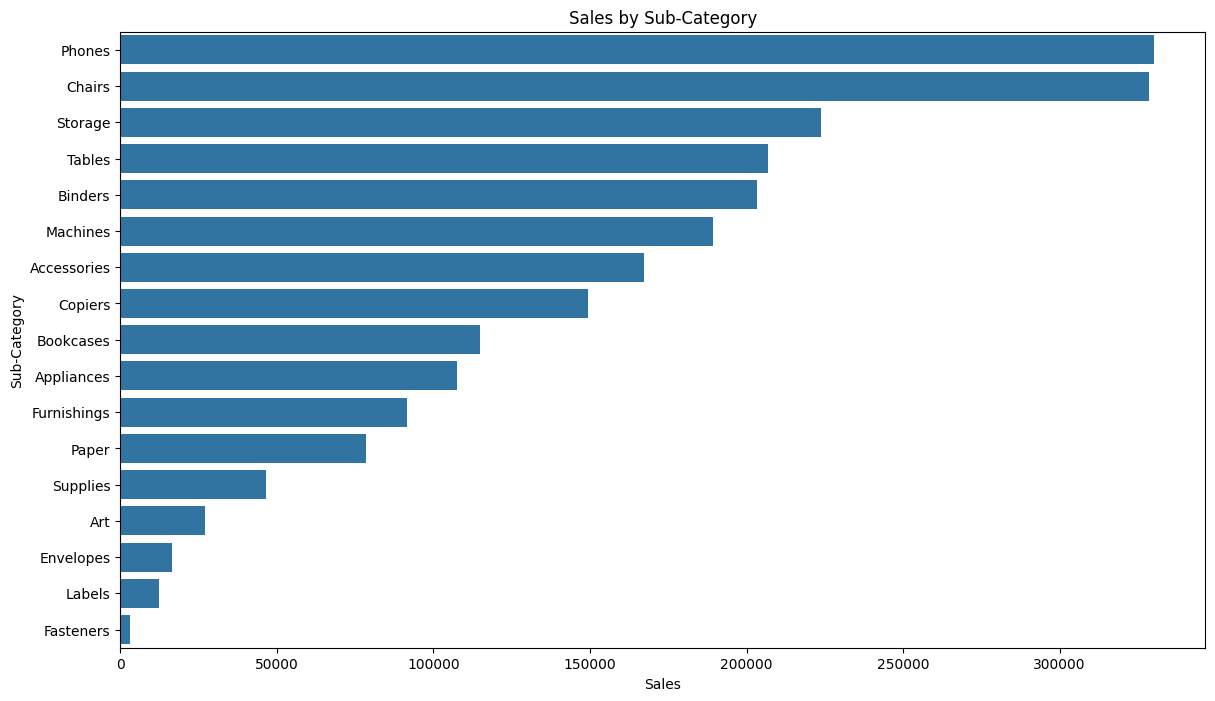

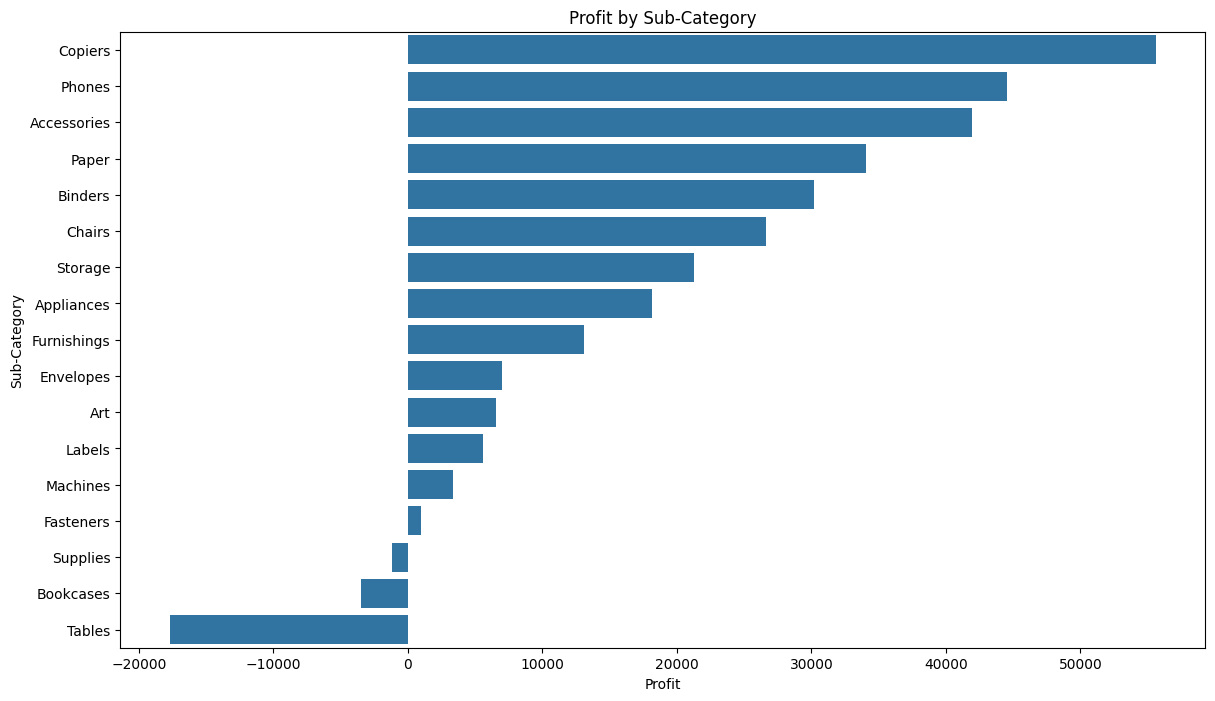

In [20]:
# Sales by Sub-Category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_subcategory, x='Sales', y='Sub-Category', order=sales_by_subcategory.sort_values('Sales', ascending=False)['Sub-Category'])
plt.title('Sales by Sub-Category')
plt.show()

# Profit by Sub-Category
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=profit_by_subcategory, x='Profit', y='Sub-Category', order=profit_by_subcategory.sort_values('Profit', ascending=False)['Sub-Category'])
plt.title('Profit by Sub-Category')
plt.show()


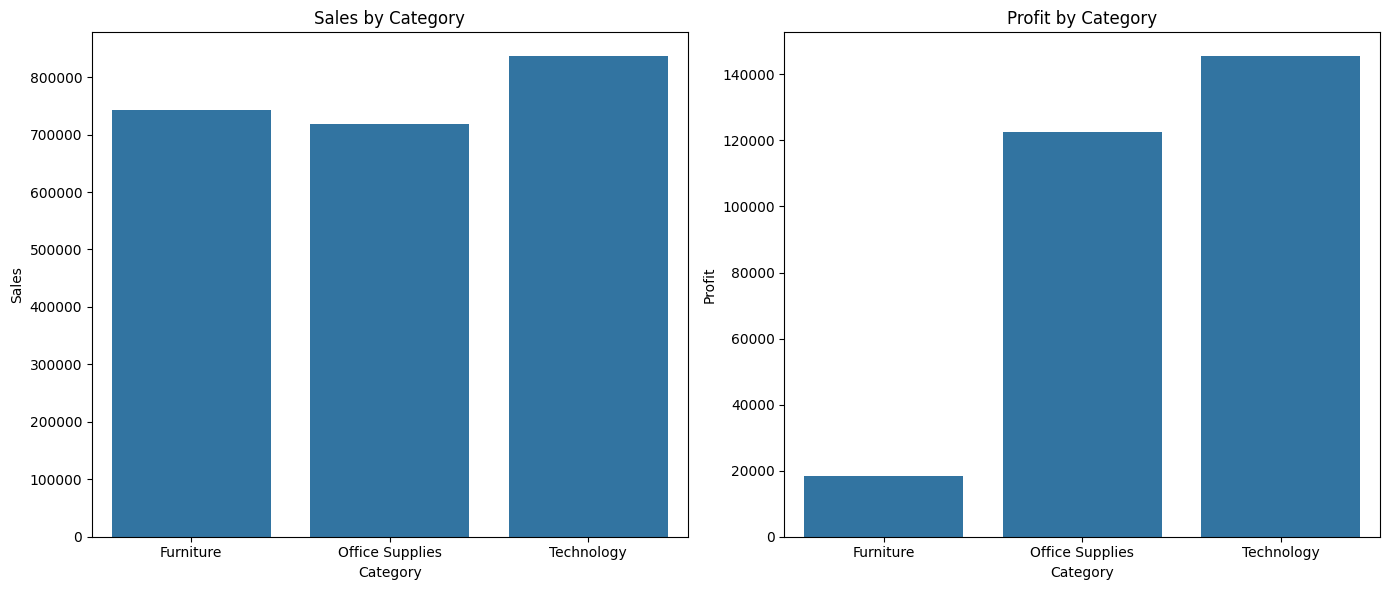

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=sales_by_category, x='Category', y='Sales', ax=axes[0])
axes[0].set_title('Sales by Category')

sns.barplot(data=profit_by_category, x='Category', y='Profit', ax=axes[1])
axes[1].set_title('Profit by Category')

plt.tight_layout()
plt.show()

In [10]:
region_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'})
print(region_profit)

               Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


# Impact of Discounts on Profits:

In [9]:
discount_profit = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'})
print(discount_profit)

                 Sales       Profit
Discount                           
0.00      1.087908e+06  320987.6032
0.10      5.436935e+04    9029.1770
0.15      2.755852e+04    1418.9915
0.20      7.645944e+05   90337.3060
0.30      1.032267e+05  -10369.2774
0.32      1.449346e+04   -2391.1377
0.40      1.164178e+05  -23057.0504
0.45      5.484974e+03   -2493.1111
0.50      5.891854e+04  -20506.4281
0.60      6.644700e+03   -5944.6552
0.70      4.062028e+04  -40075.3569
0.80      1.696376e+04  -30539.0392


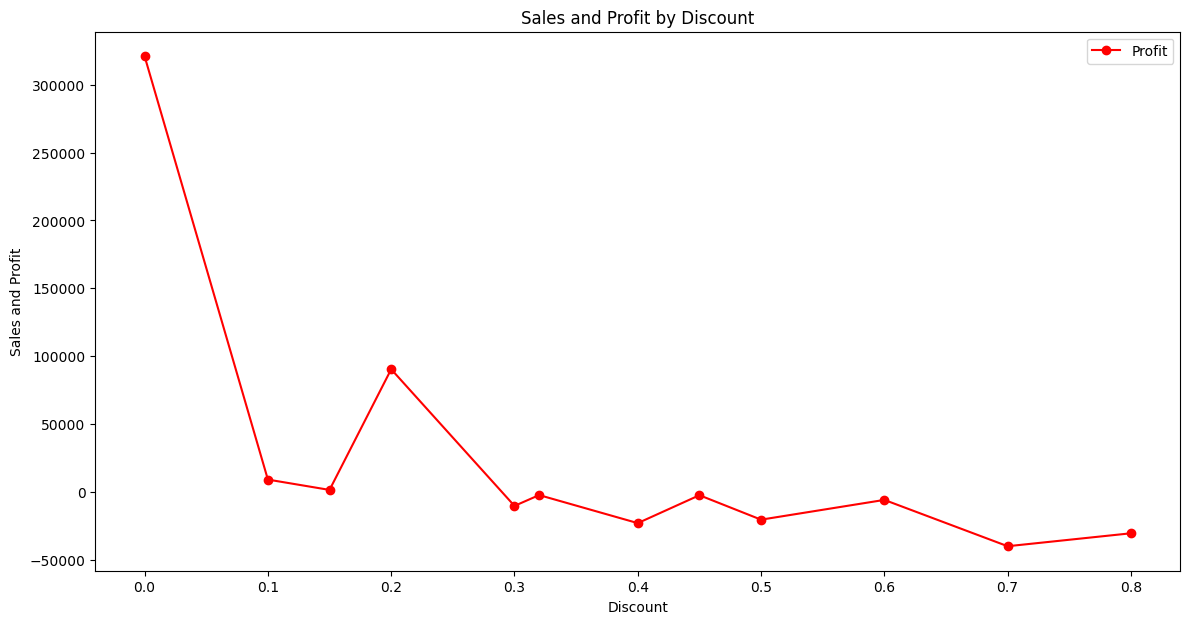

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SampleSuperstore.csv')

discount_profit = df.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(14, 7))

plt.plot(discount_profit['Discount'], discount_profit['Profit'], color='red', marker='o', label='Profit')

plt.xlabel('Discount')
plt.ylabel('Sales and Profit')
plt.title('Sales and Profit by Discount')
plt.legend()

plt.show()